In [1]:
! pip install pydotplus

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import sklearn.datasets as dataset

from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  # 2.7
from io import StringIO  # 3.6+
from IPython.display import Image  
import pydotplus

In [3]:
data = dataset.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["Class"])
x = df.values
y = target.values

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
target

,Class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [7]:
model = DecisionTreeClassifier(criterion='gini',
                               splitter='best', 
                               max_depth=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred1 = model.predict(X_train)

In [8]:
print("Accuracy Train:",metrics.accuracy_score(y_train, y_pred1))
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred))

Accuracy Train: 0.9619047619047619
Accuracy Test: 0.9555555555555556


### **Visualization as graph**

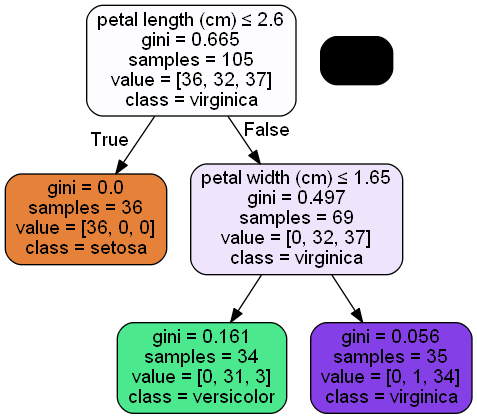

In [9]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = data.feature_names,
                class_names=data.target_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')    # To save as file
# graph.write_svg('tree.svg')    # To save as file
Image(graph.create_png())

------------
##  With Entropy

In [10]:
model2 = DecisionTreeClassifier(criterion="entropy", 
                                max_depth=2)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
y_pred1 = model2.predict(X_train)
print("Accuracy Train:",metrics.accuracy_score(y_train, y_pred1))
print("Accuracy Test:",metrics.accuracy_score(y_test, y_pred))

Accuracy Train: 0.9619047619047619
Accuracy Test: 0.9555555555555556


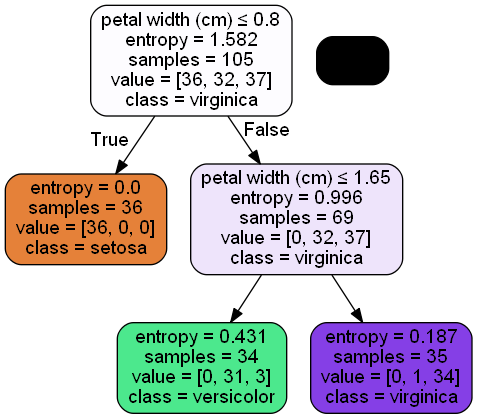

In [11]:
dot_data = StringIO()
g=export_graphviz(model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.feature_names,class_names=data.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())